In [1]:
from psisim import telescope,instrument,observation,spectrum,universe,plots
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
from astropy.io import fits
import astropy.units as u
import pysynphot as ps

Tried importing picaso, but couldn't do it


# Run simulation, write GPIESYields.txt, write PlanetTables.txt

In [2]:
file = open('PlanetTables2.txt', 'w')
file.close()
file = open('GPIESYields2.txt', 'w')
file.close()

with open('GPIESYields2.txt', 'a') as file:
    file.write('Run #\tTotal\tIn range\tDetected\n')
with open('PlanetTables2.txt', 'a') as file:
    file.write('Name\tDist pc\tStarSpT\tAngSep "\tSMA AU\tJup Mass\tStarImag\tStarHmag\tAge Myr\tSol Mass\tAOmag\tDetected\tContrast\tDet Lim\n')

for i in range(1000):
    if i in [x*10 for x in range(120)]:
        print(i)
    with open('GPIESYields2.txt', 'a') as file:
        file.write('{0:.0f}'.format(i+1))
    %run ./GPIESYieldCalc.py

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


# Plot GPIESYields.txt Data

In [3]:
total = []
detectable = []
detected = []
planet_nums = np.loadtxt("./GPIESYields2.txt", dtype = float, skiprows = 2)
for run in planet_nums:
    total += [run[1]]
    detectable += [run[2]]
    detected += [run[3]]

### Detected Planets

In [26]:
np.exp(2)

7.38905609893065

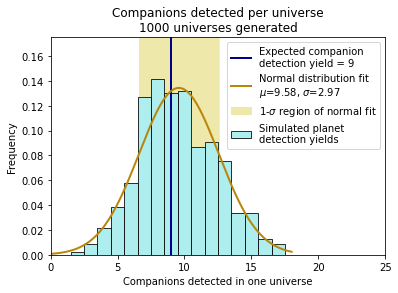

In [117]:
import matplotlib.pyplot as plt
plt.title('Companions detected per universe\n1000 universes generated',size = 12)
plt.xlabel('Companions detected in one universe', size = 10)
plt.ylabel('Frequency', size = 10)
def normal(x,mu,sigma):
    return np.exp(-.5*((x-mu)/sigma)**2)/(sigma*np.sqrt(2*np.pi))
plt.hist(detected, bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5], color = 'paleturquoise', edgecolor='black', linewidth=.8,density = True)
plt.plot([9 for x in np.linspace(0,.18,2)],np.linspace(0,.18,2),color = 'darkblue',linewidth = 2)

plt.plot(np.linspace(0,18,1000),[normal(x,9.58,2.97) for x in np.linspace(0,18,1000)],color = 'darkgoldenrod',linewidth = 2)
plt.fill_between(np.linspace(9.58-2.97,9.58+2.97,1000),[.2 for x in np.linspace(9.58-2.97,9.58+2.97,1000)],color = 'palegoldenrod')
plt.ylim(0,.175)
plt.xlim(0,25)
plt.legend(["Expected companion\ndetection yield = 9","Normal distribution fit\n$\mu$=9.58, $\sigma$=2.97","1-$\sigma$ region of normal fit","Simulated planet\ndetection yields"],fontsize = '10')

In [5]:
print(np.mean(detected))
print(np.median(detected))
print(np.std(detected))

9.581581581581581
9.0
2.9688238439013555


### Detectable Planets

Text(0, 0.5, 'Frequency')

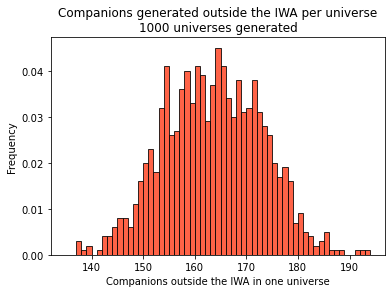

In [129]:
plt.hist(detectable, bins = [x+135 for x in range(60)], color = 'tomato', edgecolor='black', linewidth=.8,density = True)
plt.title('Companions generated outside the IWA per universe\n1000 universes generated',size = 12)
plt.xlabel('Companions outside the IWA in one universe',size = 10)
plt.ylabel('Frequency',size = 10)

In [35]:
print(np.mean(detectable))
print(np.median(detectable))
print(np.std(detectable))

163.05405405405406
163.0
9.410719564613796


### Generated Planets

Text(0, 0.5, 'Frequency')

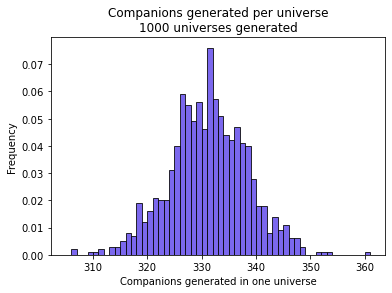

In [130]:
plt.hist(total, bins = [x+305 for x in range(57)], color = 'mediumslateblue', edgecolor='black', linewidth=.8, density = True)
plt.title('Companions generated per universe\n1000 universes generated',size = 12)
plt.xlabel('Companions generated in one universe',size =10)
plt.ylabel('Frequency',size =10)

In [38]:
print(np.mean(total))
print(np.median(total))
print(np.std(total))

330.7117117117117
331.0
7.120651420314197


# Plot PlanetTables.txt Data

In [132]:
AngSep = []
SMA_detected = []
SMA_total = []
PlanetMass_detected = []
PlanetMass_total = []
contrast = []
detected_bool = []
planet_nums = np.loadtxt("./PlanetTables2.txt", dtype = str, skiprows = 1, delimiter = '\t')
for run in planet_nums:
    contrast += [float(run[12])]
    AngSep += [float(run[3])]
    SMA_total += [float(run[4])]
    detected_bool += [run[11]]
    PlanetMass_total += [float(run[5])]
    if run[11] == 'True': 
        SMA_detected += [float(run[4])]
        PlanetMass_detected += [float(run[5])]
  


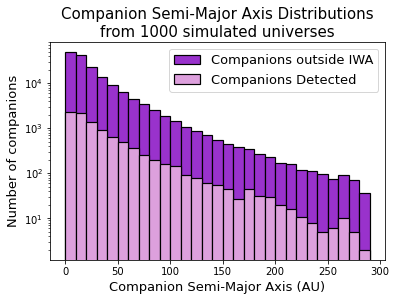

In [158]:
plt.hist(SMA_total, bins = [x*10 for x in range(30)], color = 'darkorchid', edgecolor='black', linewidth=1.2)
plt.hist(SMA_detected, bins = [x*10 for x in range(30)], color = 'plum', edgecolor='black', linewidth=1.2)
plt.title('Companion Semi-Major Axis Distributions\nfrom 1000 simulated universes', size = 15)
plt.xlabel('Companion Semi-Major Axis (AU)',size = 13)
plt.ylabel('Number of companions',size = 13)
plt.yscale('log')
plt.legend(["Companions outside IWA","Companions Detected"],fontsize = '13')


In [135]:
browndwarfs = 0
planets = 0
for i in PlanetMass_detected:
    if i > 13:
        browndwarfs += 1
    else:
        planets += 1
print(browndwarfs/len(detected))
print(planets/len(detected))

3.7467467467467466
5.8458458458458455


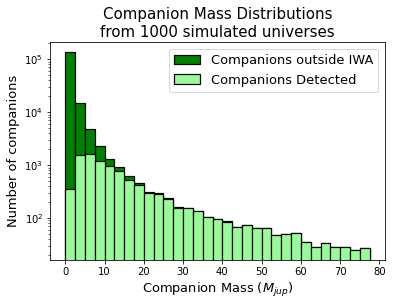

In [159]:
plt.hist(PlanetMass_total, bins = [x*2.5 for x in range(32)], color = 'green', edgecolor='black', linewidth=1.2)
plt.hist(PlanetMass_detected, bins = [x*2.5 for x in range(32)], color = 'palegreen', edgecolor='black', linewidth=1.2)
plt.title('Companion Mass Distributions\nfrom 1000 simulated universes',size = 15)
plt.xlabel('Companion Mass ($M_{jup}$)',size = 13)
plt.ylabel('Number of companions',size = 13)
plt.yscale('log')
plt.legend(["Companions outside IWA","Companions Detected"],fontsize = '13')

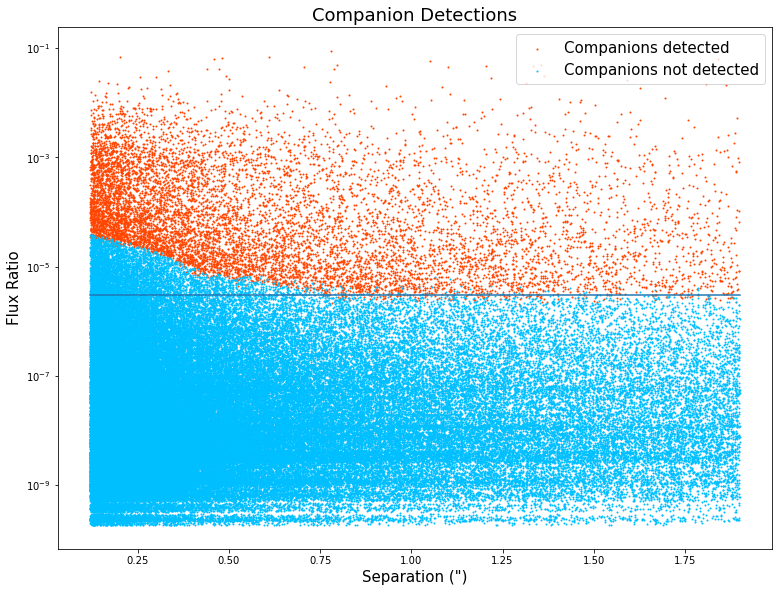

In [217]:
plt.figure(figsize = [12.8, 9.6])

true_contrast = []
true_AngSep = []
false_contrast = []
false_AngSep = []
for i in range(len(contrast)):
    if detected_bool[i] == 'True':
        true_contrast += [contrast[i]]
        true_AngSep += [AngSep[i]]
    else:
        false_contrast += [contrast[i]]
        false_AngSep += [AngSep[i]]
plt.scatter(true_AngSep, true_contrast, color = 'orangered', marker = 'o', s = 1)
plt.scatter(false_AngSep, false_contrast, color = 'deepskyblue', marker = 'o', s = 1)
# plt.xscale('log')
plt.yscale('log')
plt.title('Companion Detections',size = 18)
plt.xlabel('Separation (")',size = 15)
plt.ylabel('Flux Ratio', size = 15)
plt.legend(["Companions detected", "Companions not detected"], loc='upper right',fontsize=15)
plt.plot(np.linspace(.12,1.9,4),[3e-6 for x in np.linspace(.12,1.9,4)])

In [ ]:
from random import random
yrandom()

In [ ]:
random.randint(1,2)

In [ ]:
len(PlanetMass_detected)

In [138]:
len(PlanetMass_total)

163046